In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\dell\\Desktop\\Machine Learning\\advertising.csv")

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


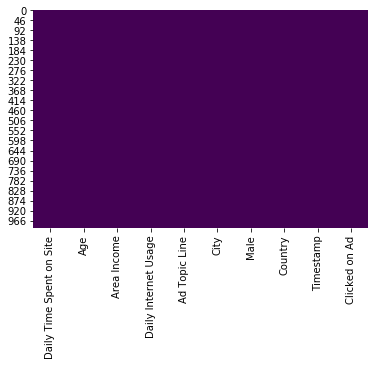

In [5]:
sns.heatmap(pd.isnull(df),cbar=False,cmap="viridis")

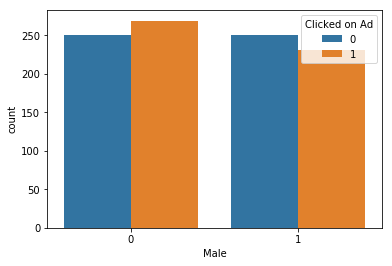

In [6]:
sns.countplot(x="Male",hue="Clicked on Ad",data=df)

In [37]:
df['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [7]:
df['Age'].value_counts()

31    60
36    50
28    48
29    48
33    43
30    39
34    39
35    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
39    30
45    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
49    18
46    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
21     6
20     6
19     6
57     6
60     4
58     4
56     2
59     2
61     1
Name: Age, dtype: int64

In [8]:
df['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

In [9]:
df['Country'].value_counts()

France                                                 9
Czech Republic                                         9
Micronesia                                             8
South Africa                                           8
Senegal                                                8
Greece                                                 8
Liberia                                                8
Turkey                                                 8
Cyprus                                                 8
Afghanistan                                            8
Australia                                              8
Peru                                                   8
Albania                                                7
Fiji                                                   7
Cambodia                                               7
Bosnia and Herzegovina                                 7
Bahamas                                                7
Luxembourg                     

In [10]:
df['Timestamp'].value_counts().head()

2016-06-03 21:43:21    1
2016-01-05 16:26:44    1
2016-06-09 14:24:06    1
2016-02-21 13:11:08    1
2016-05-16 18:51:59    1
Name: Timestamp, dtype: int64

C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


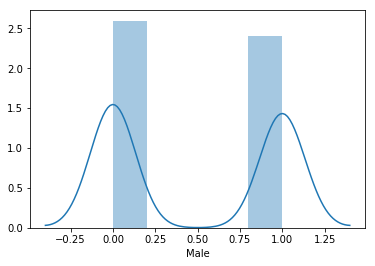

In [11]:
sns.distplot(df['Male'],hist=True)

In [12]:
x=df.drop(['Ad Topic Line','Timestamp',"Clicked on Ad"],axis=1)
y=df['Clicked on Ad']

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
x['Country']=LabelEncoder().fit_transform(x['Country'])

In [15]:
x['City']=LabelEncoder().fit_transform(x['City'])

In [16]:
x.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country
0,68.95,35,61833.90,256.09,961,0,215
1,80.23,31,68441.85,193.77,903,1,147
2,69.47,26,59785.94,236.50,111,0,184
3,74.15,29,54806.18,245.89,939,1,103
4,68.37,35,73889.99,225.58,805,0,96


In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
City                        1000 non-null int64
Male                        1000 non-null int64
Country                     1000 non-null int64
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [18]:
#pd.isnull(x).head()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.svm import SVC

In [23]:
model=LogisticRegression().fit(x_train,y_train)

In [58]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [59]:
#PCA
from sklearn.decomposition import PCA


In [60]:
pca=PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
variance_ratio=pca.explained_variance_ratio_

In [61]:
variance_ratio

array([0.29248728, 0.14746856])

In [71]:
model1=SVC(kernel="rbf").fit(x_train,y_train)

In [72]:
#pred=model.predict(x_test)

In [73]:
pred1=model1.predict(x_test)

In [74]:
from sklearn.metrics import confusion_matrix,classification_report

In [75]:
print(confusion_matrix(y_test,pred1))

[[142   4]
 [  8 146]]


In [76]:
print(classification_report(y_test,pred1))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       146
          1       0.97      0.95      0.96       154

avg / total       0.96      0.96      0.96       300



In [77]:
from sklearn.model_selection import cross_val_score

In [80]:
accuracies=cross_val_score(estimator=SVC(kernel="rbf"),X=x_train,y=y_train,cv=10)

In [81]:
accuracies

array([0.94366197, 1.        , 1.        , 0.95774648, 0.97142857,
       0.92857143, 0.97101449, 0.95652174, 0.98550725, 0.98550725])

In [82]:
accuracies.mean()

0.9699959175341908

In [83]:
accuracies.std()

0.02241840712474179